In [69]:
#Import data: Uncomment file and reduced for different models.
import pandas as pd
file = "binary"
file = "three"
# file = "five"
method = "PCA"
reduced = ""
# reduced = "(reduced)"

DATAFILE = "./prepared_data/join_"+file+"_scale.csv"
file = file + reduced
Purchase_DF = pd.read_csv(DATAFILE)
print(list(Purchase_DF))
# Purchase_DF

['mean_unexpcost', 'median_unexpcost', 'mean_stdcost', 'median_stdcost', 'mean_pocost', 'median_pocost', 'mean_qty', 'median_qty', 'mean_costsave', 'median_costsave', 'mean_spend', 'median_spend', 'mean_return_spend', 'median_return_spend', 'mean_leadtime', 'median_leadtime', 'mean_abc', 'median_abc', 'mean_source', 'median_source', 'Category', 'mean_late', 'median_late', 'mean_early', 'median_early', '%Critical', 'SupplierID', 'quality_risk_mean', 'quality_risk_median', 'delivery_risk_mean', 'delivery_risk_median']


In [70]:
#Select features
feats = ['mean_unexpcost', 'mean_return_spend', 'mean_qty', 'mean_costsave', 'mean_spend',
             'mean_leadtime','mean_abc', 'mean_source',
             'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
if(reduced != ""):
    feats = ['mean_unexpcost', 'mean_return_spend','mean_spend',
             'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
    print(feats)
Purch_PCA = Purchase_DF[feats]
Purch_PCA = Purch_PCA.dropna()

x = Purch_PCA
X = Purch_PCA.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

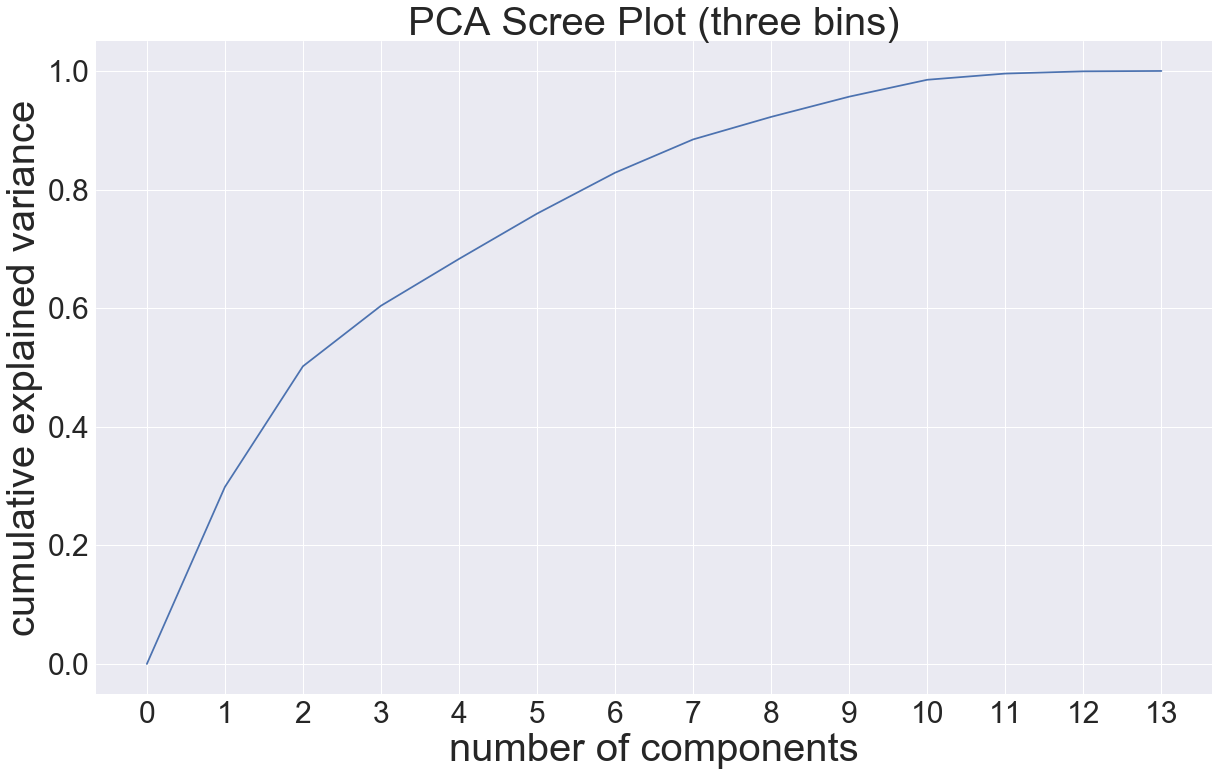

In [77]:
#Scree Plot
pca = PCA().fit(x)

plt.figure(figsize=(20,12))
plt.xlabel('number of components', fontsize=40)
plt.ylabel('cumulative explained variance', fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize=30)
plt.plot(np.insert(np.cumsum(pca.explained_variance_ratio_),0,0))
plt.xticks(np.arange(0, 14, 1.0))


plt.title(method + " Scree Plot ("+file+" bins)", fontsize=40)
plt.savefig(method+"_"+file+"_bin_scree_plot")

In [14]:
#Run with 6 components
pca = PCA(n_components=6)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (578, 13)
transformed shape: (578, 6)


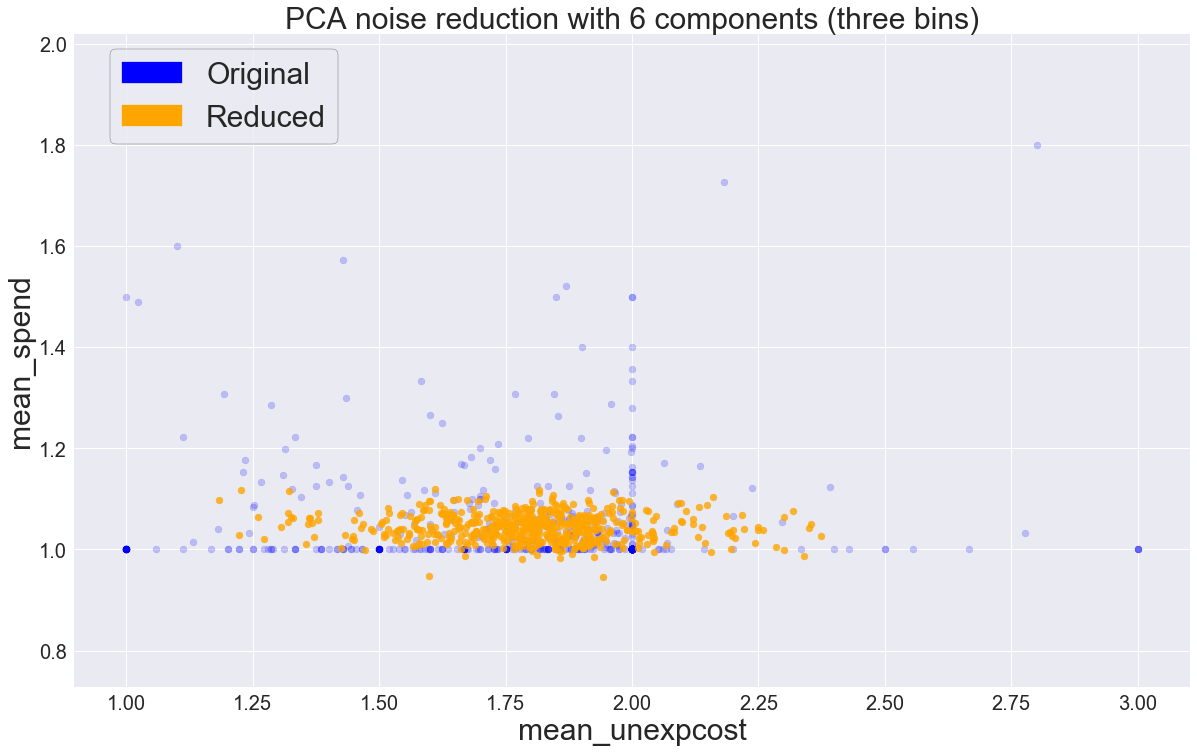

In [40]:
#Plot first two features against reduction
X_new = pca.inverse_transform(X_pca)
plt.figure(figsize=(20,12))
plt.xlabel('mean_unexpcost', fontsize=30)
plt.ylabel('mean_spend', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.title(method + " noise reduction with 6 components ("+file+" bins)", fontsize=30)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2, color = "b")
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color = "orange")
plt.axis('equal');

import matplotlib.patches as mpatches
a = mpatches.Patch(color='b', label='Original')
b = mpatches.Patch(color='orange', label='Reduced')
leg = plt.legend(handles =[a,b],labels = ['Original','Reduced'],prop={'size': 30},frameon=True,bbox_to_anchor=(.25, 1));
# leg = plt.legend()
leg.get_frame().set_edgecolor('black')

plt.savefig(method+"_"+file+"_bin_noise_reduction")

In [6]:
#Run Model
pca = PCA(n_components = 6)
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)
print(pca.explained_variance_ratio_)

(578, 8)
(578, 6)
[0.38006866 0.21367683 0.20452925 0.1360133  0.04114599 0.01516192]


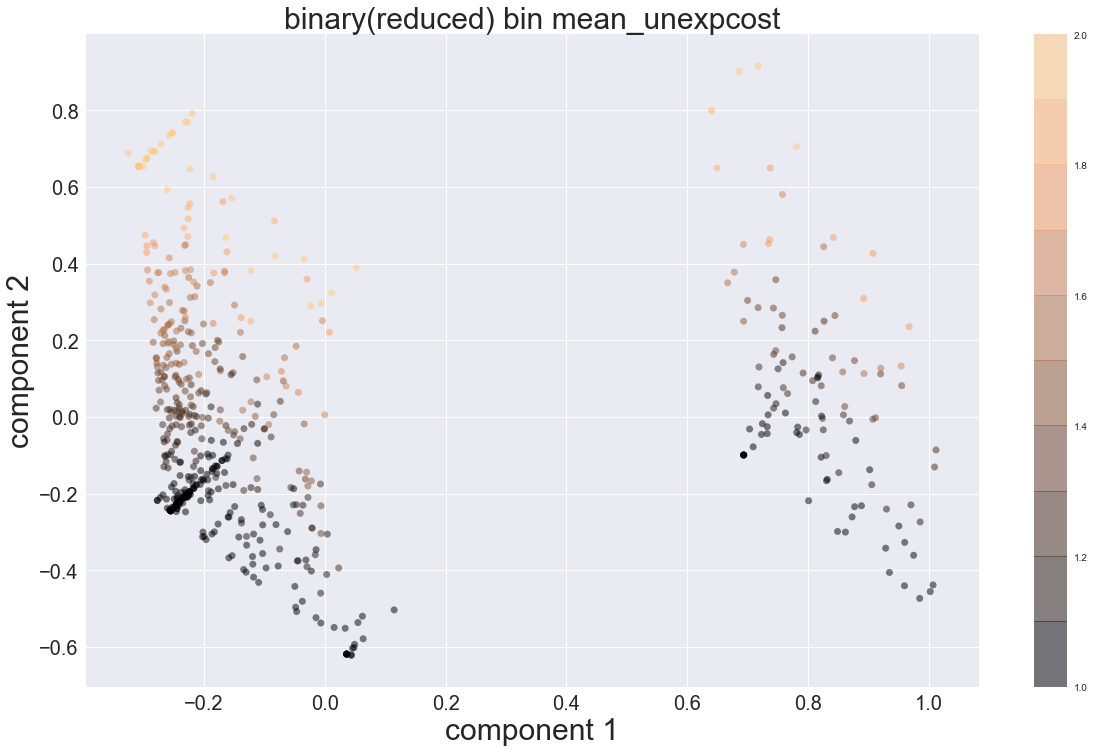

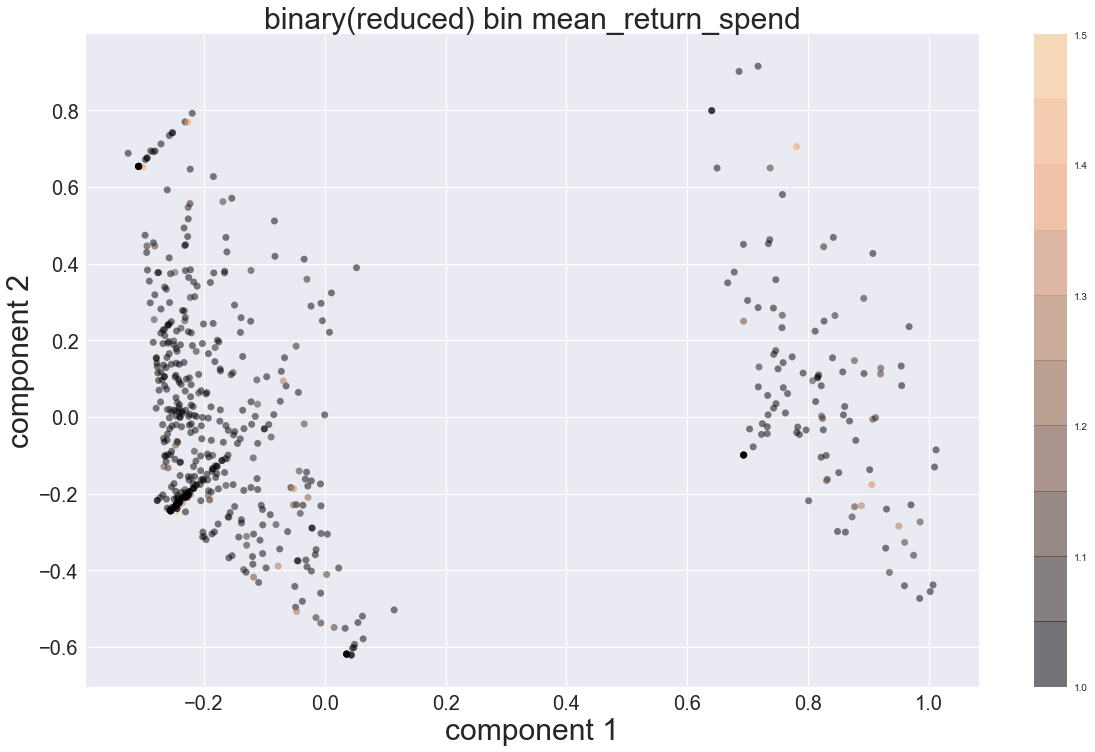

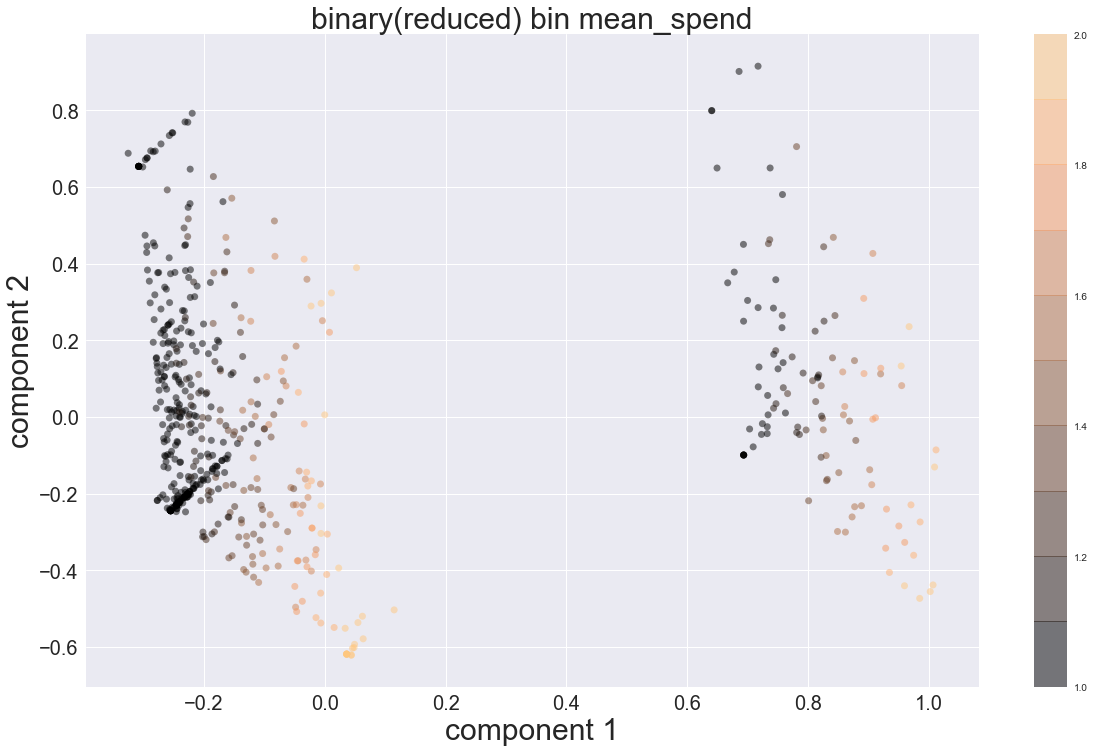

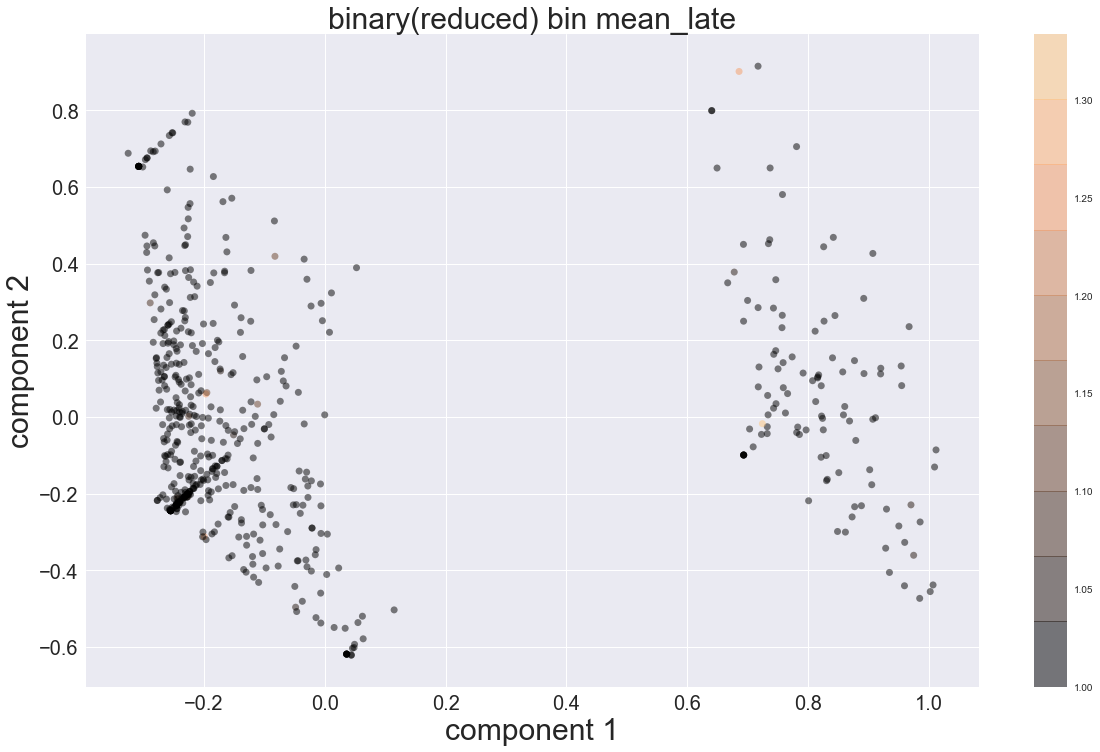

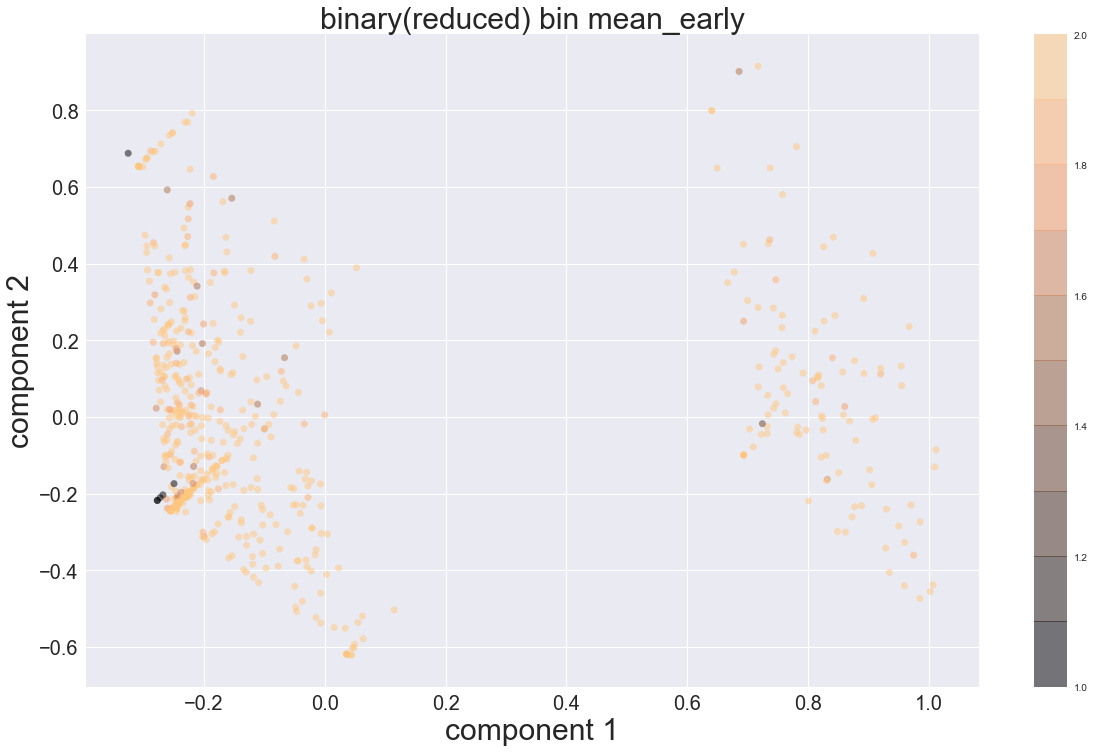

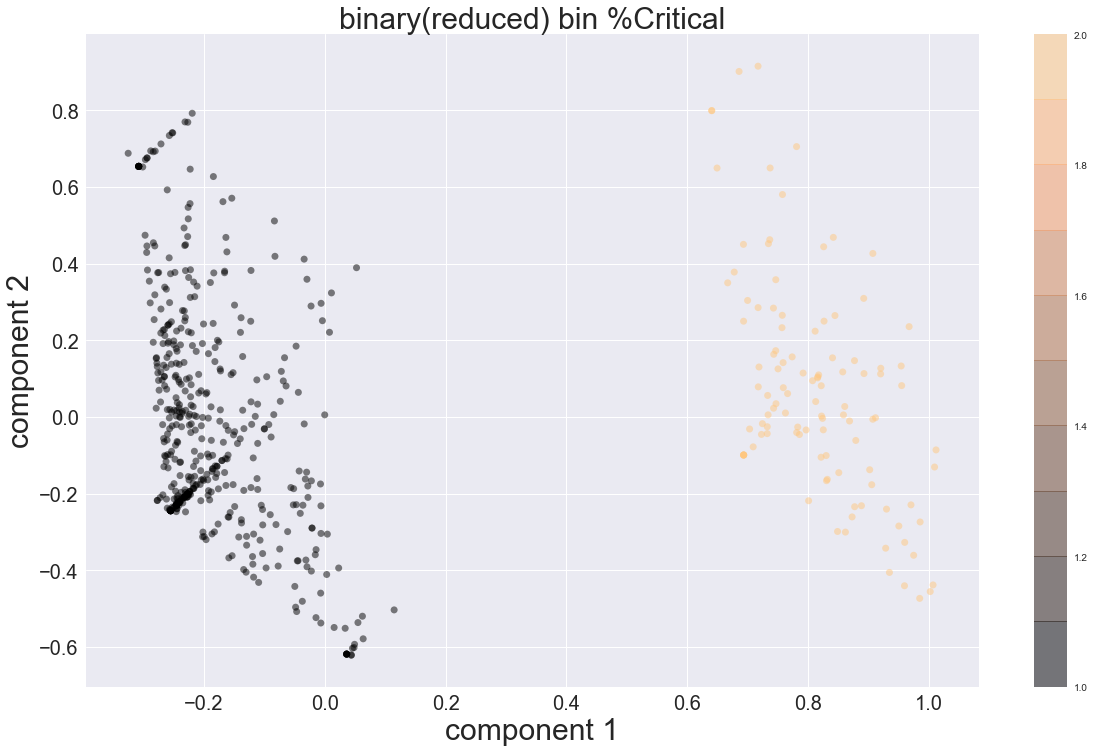

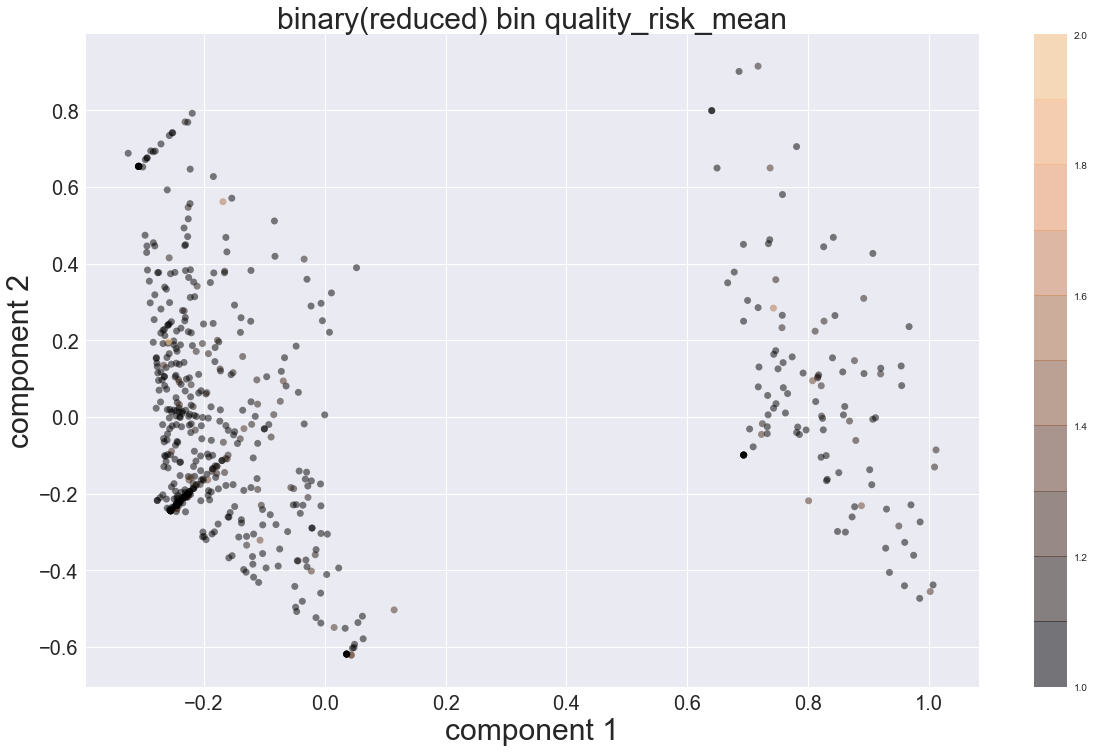

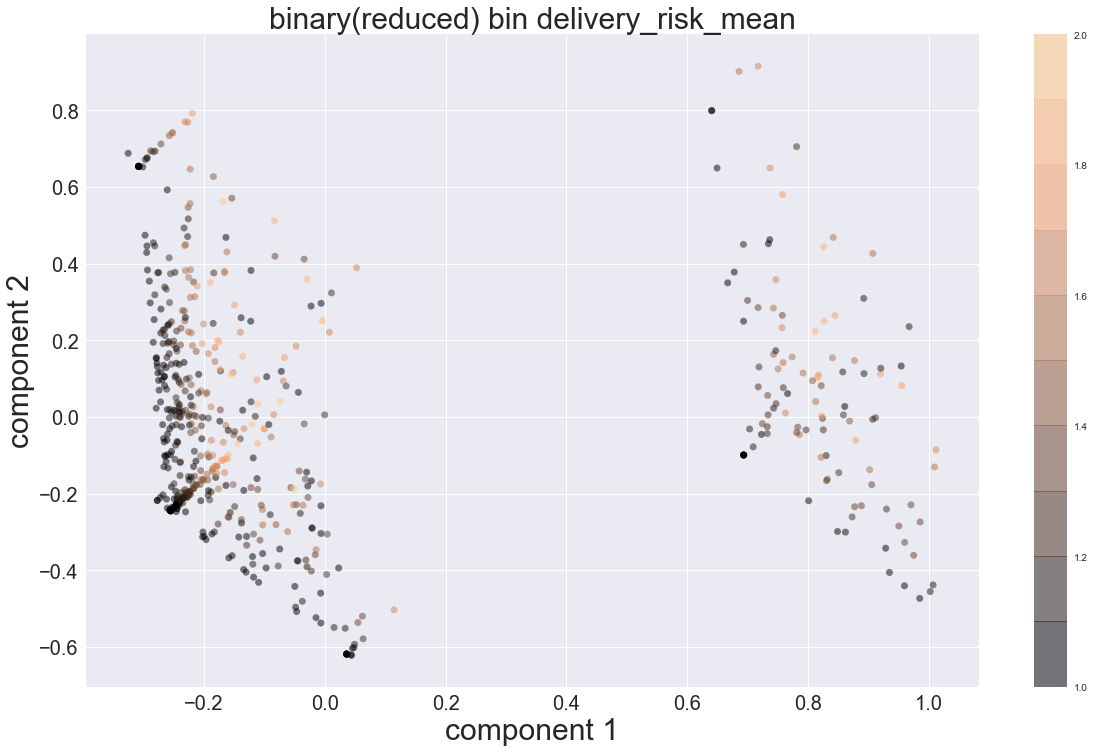

In [7]:
#Optional colormap changing
# cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['black','orange'], N=256)

#Plot the components against each feature
#Each plot shows the 12 dimensional data projected along two dimensions of high variance(the components)
#This is the optimal stretch and rotation in the 12-D data that lets us see the separation of the data in 2 dimension.
for feat in feats:
    plt.figure(figsize=(20,12))
    plt.scatter(projected[:, 0], projected[:, 1],
                c=x[feat], edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('copper', 10))
    plt.xlabel('component 1', fontsize=30)
    plt.ylabel('component 2', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.title(file+" bin "+feat, fontsize=30)
    plt.colorbar();
    fname = method+"_"+file+"_1_2_" + feat
    plt.savefig(fname)
    plt.show()

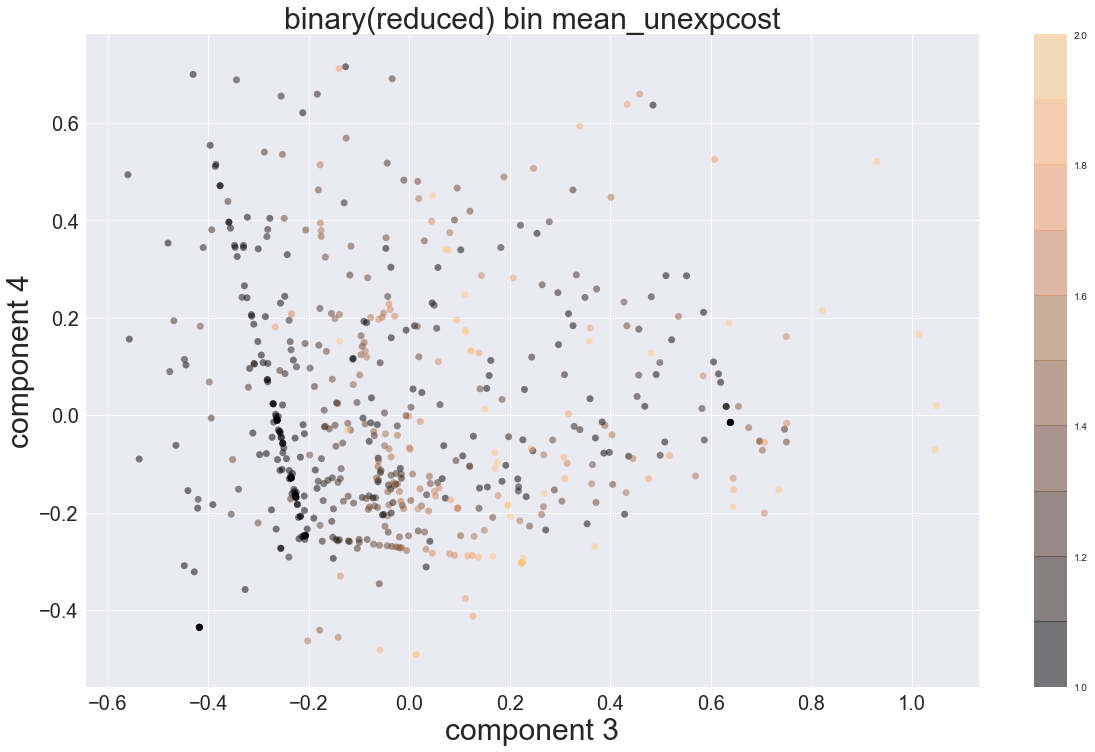

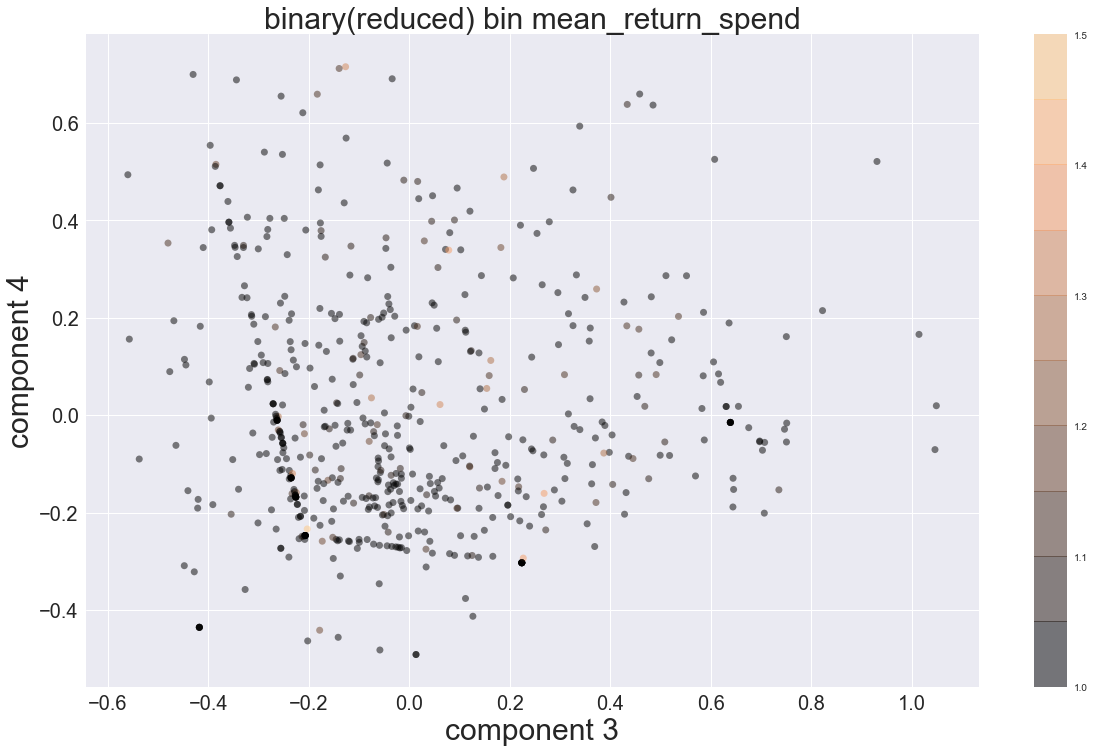

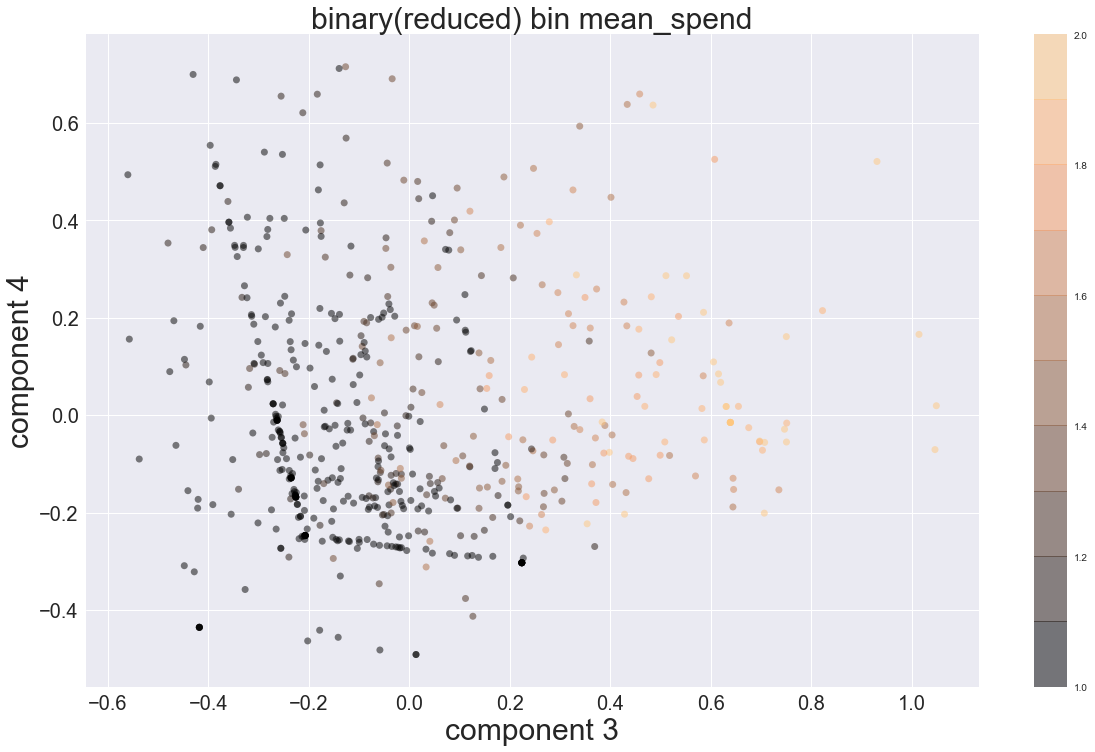

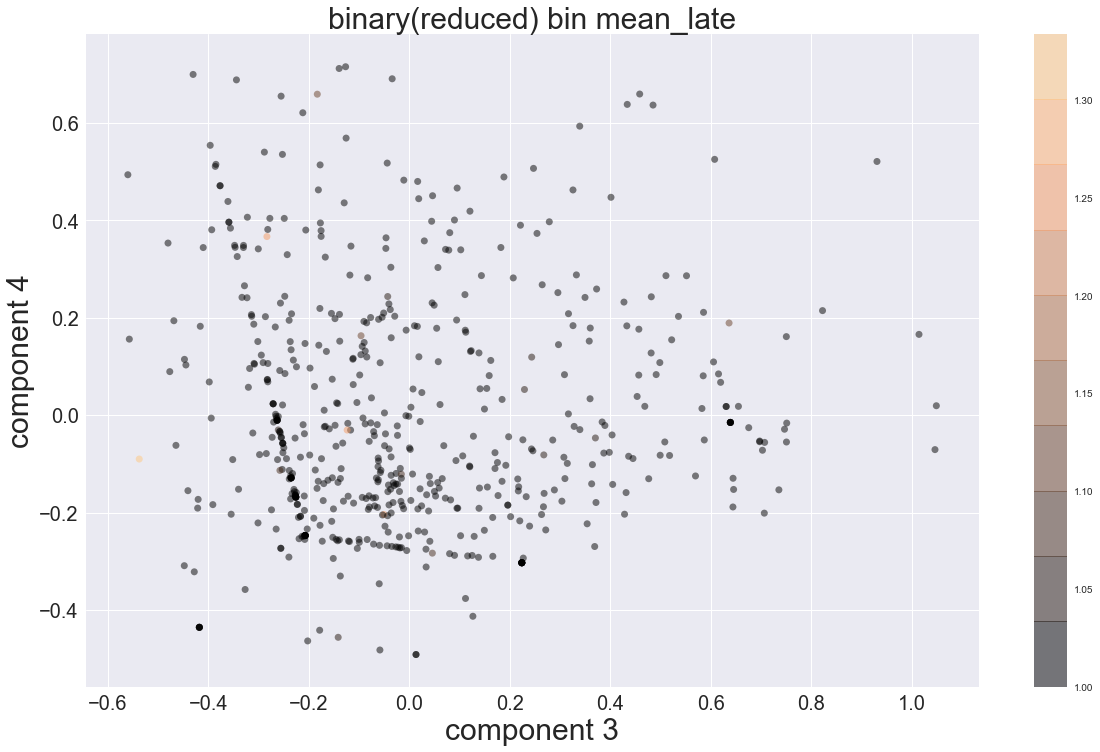

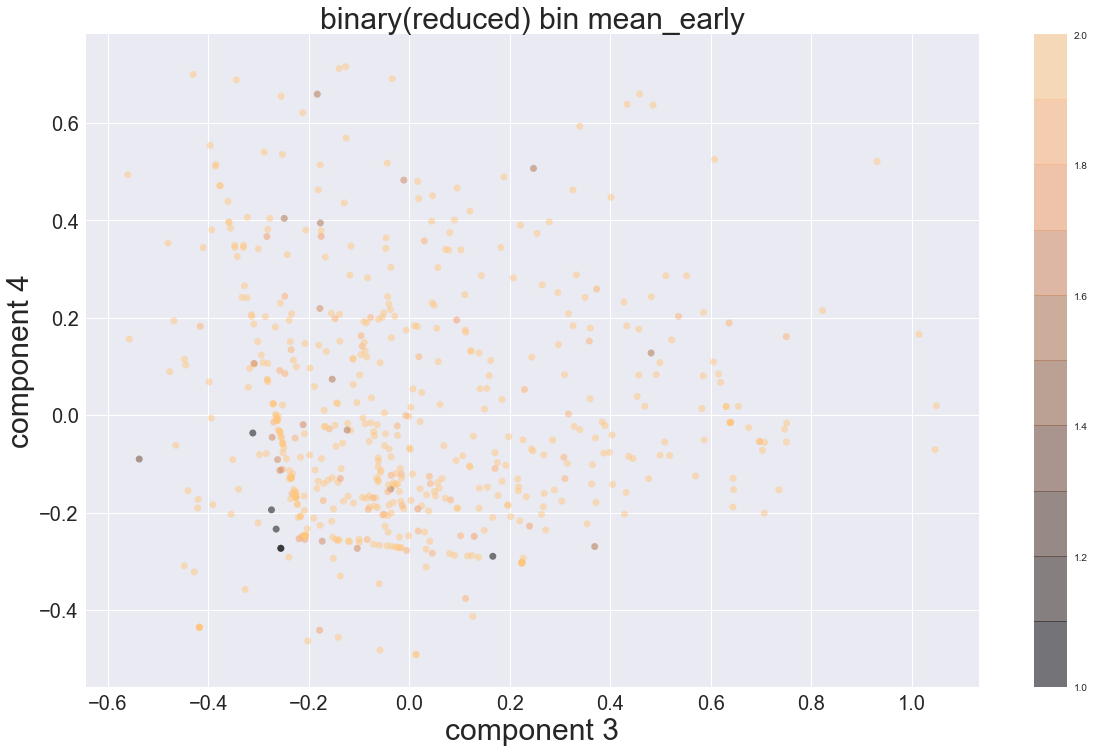

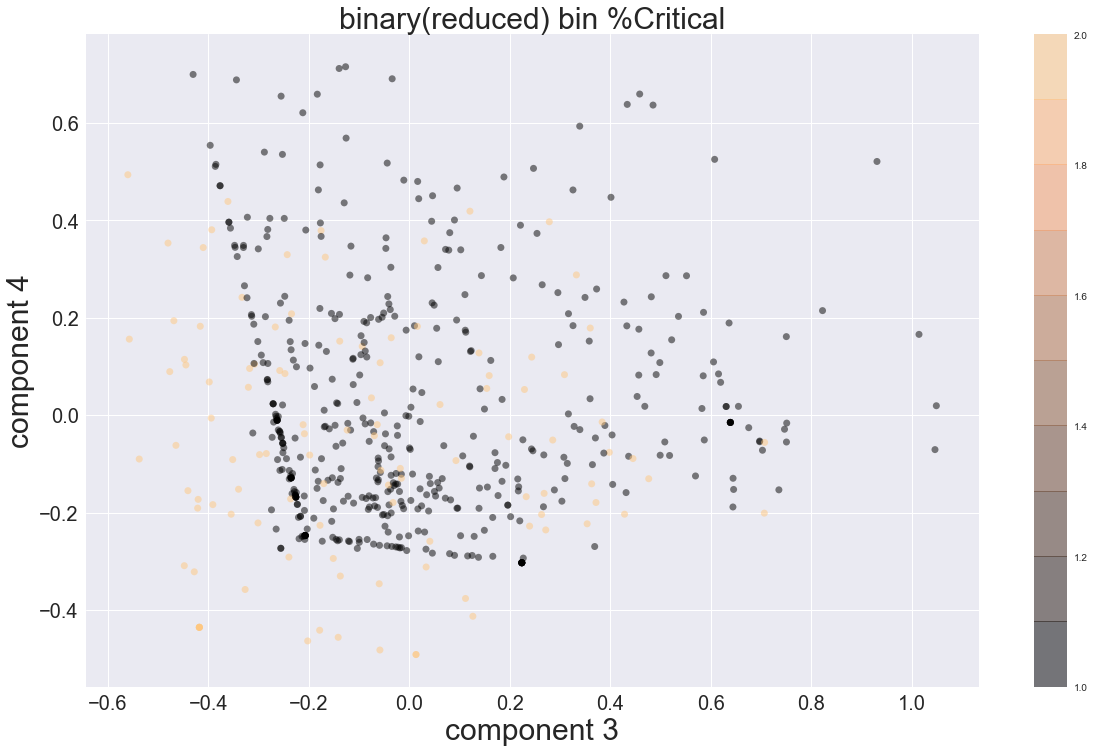

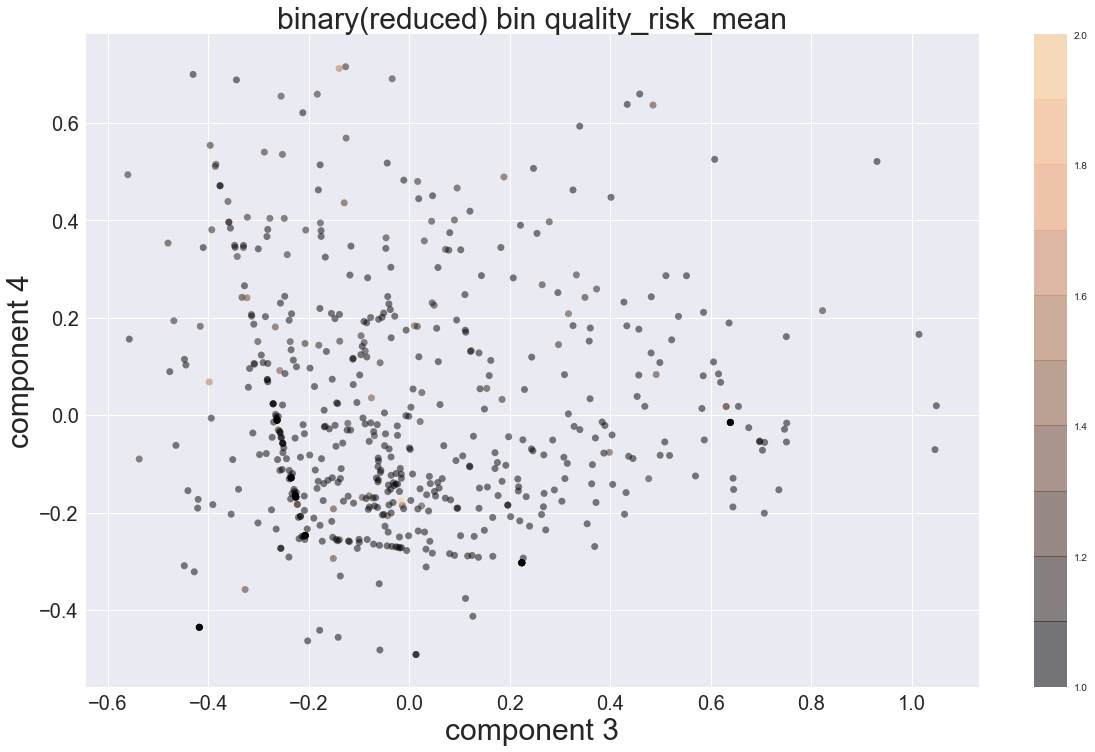

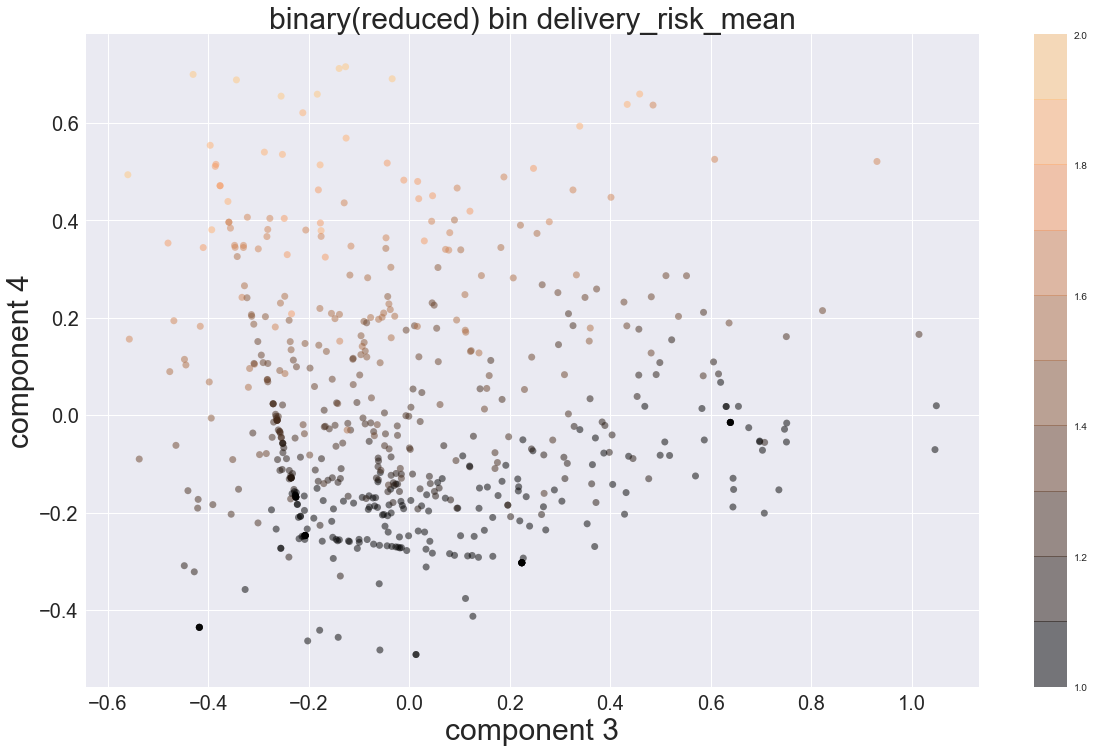

In [8]:
#Optional colormap changing
# cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['black','orange'], N=256)

#Plot the components against each feature
#Each plot shows the 12 dimensional data projected along two dimensions of high variance(the components)
#This is the optimal stretch and rotation in the 12-D data that lets us see the separation of the data in 2 dimension.
for feat in feats:
    plt.figure(figsize=(20,12))
    plt.scatter(projected[:, 2], projected[:, 3],
                c=x[feat], edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('copper', 10))
    plt.xlabel('component 3', fontsize=30)
    plt.ylabel('component 4', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.title(file+" bin "+feat, fontsize=30)
    plt.colorbar();
    fname = method+"_"+file+"_3_4_" + feat
    plt.savefig(fname)
    plt.show()

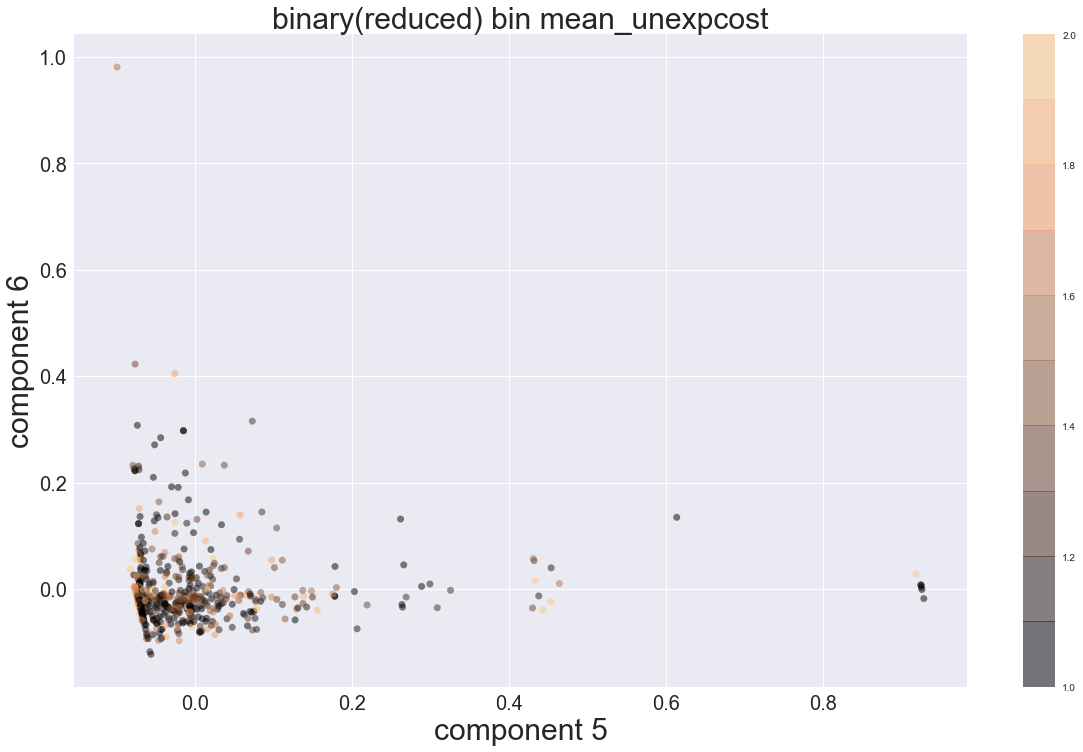

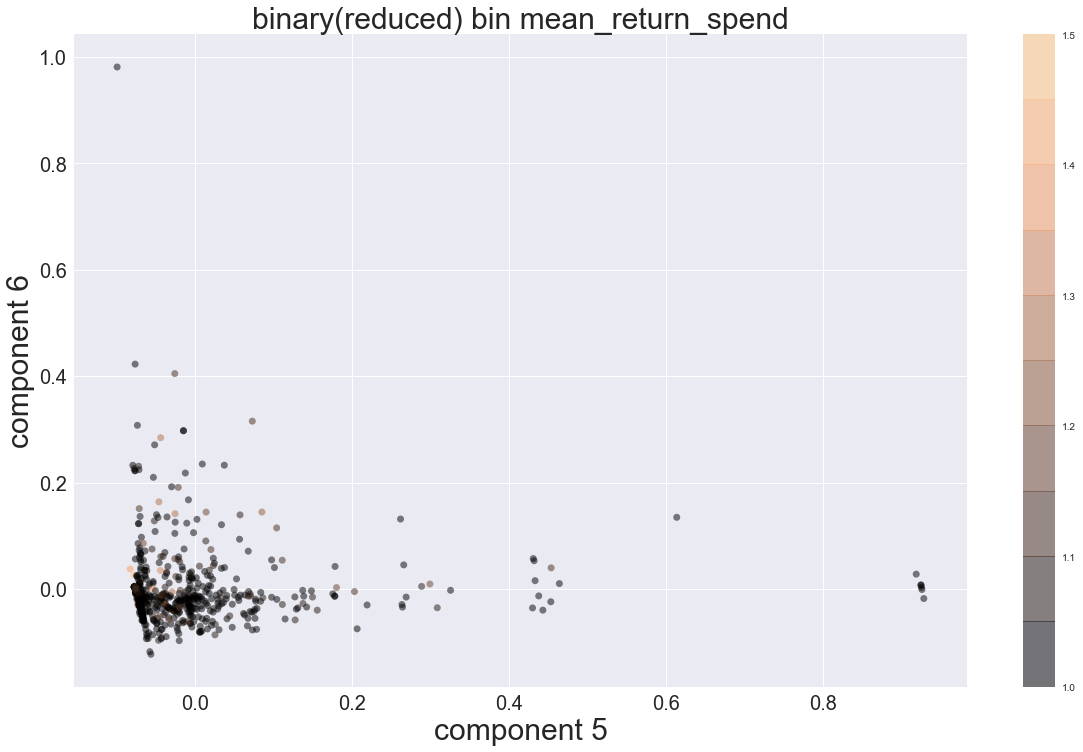

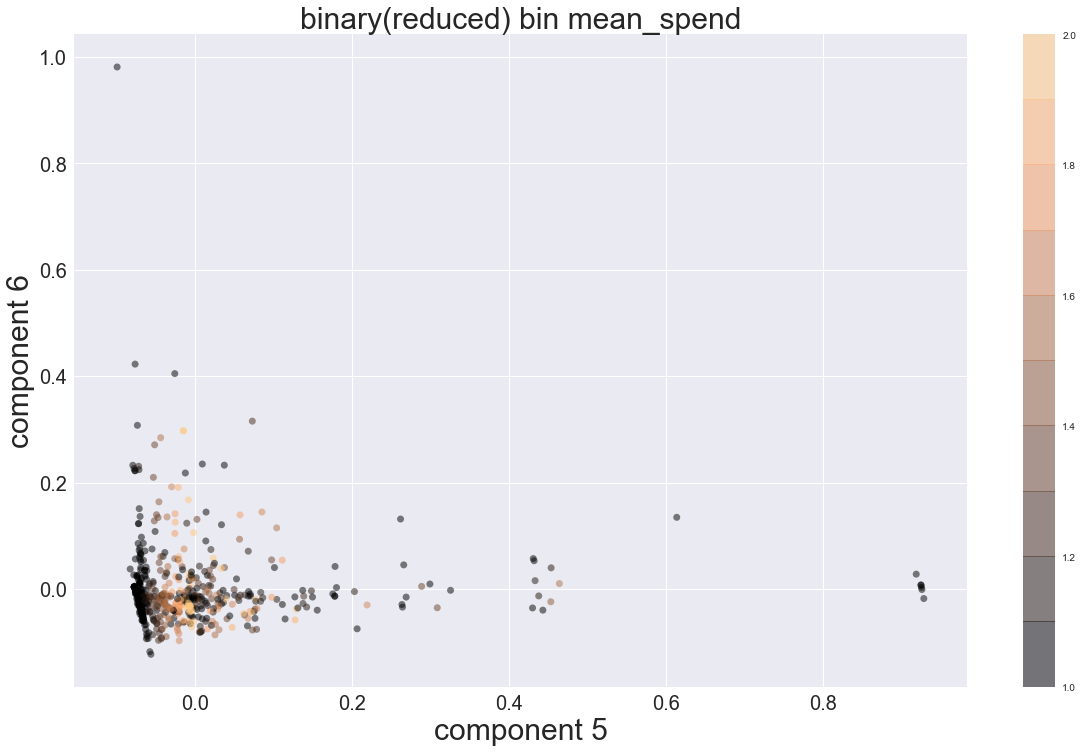

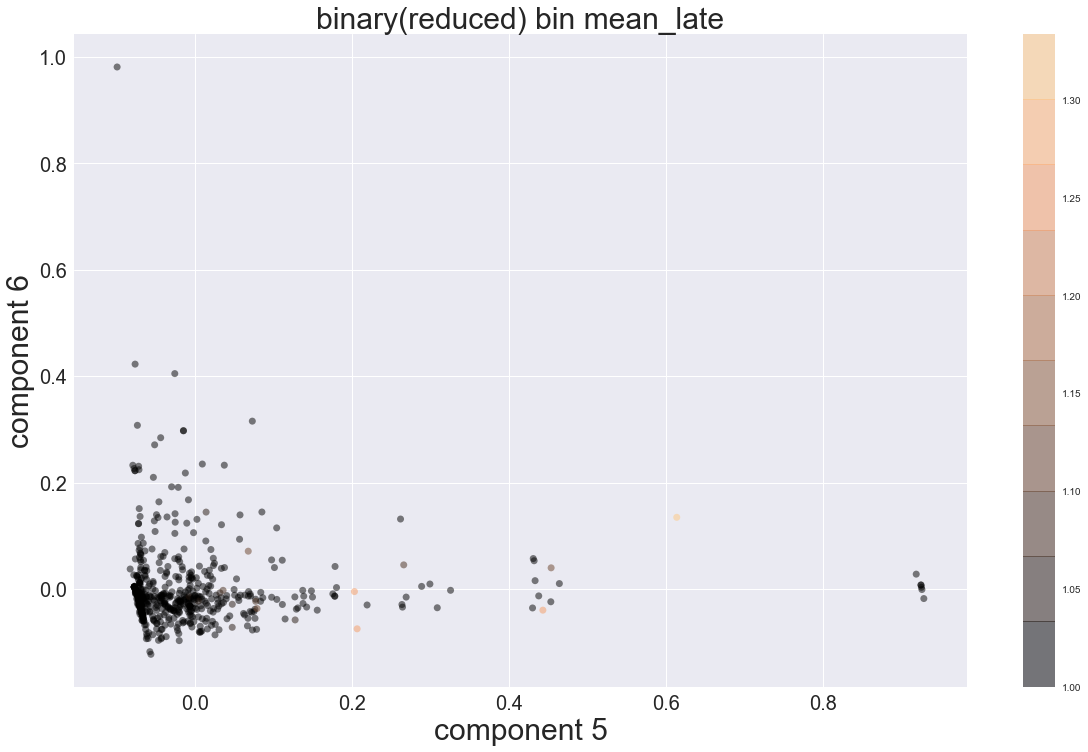

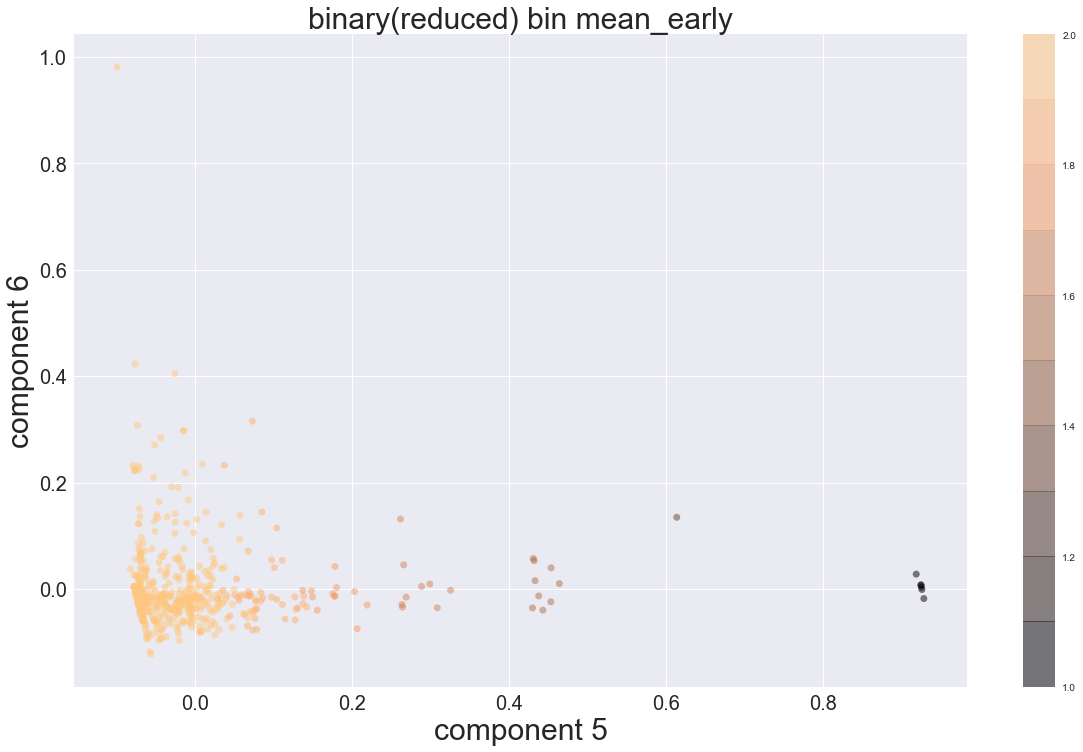

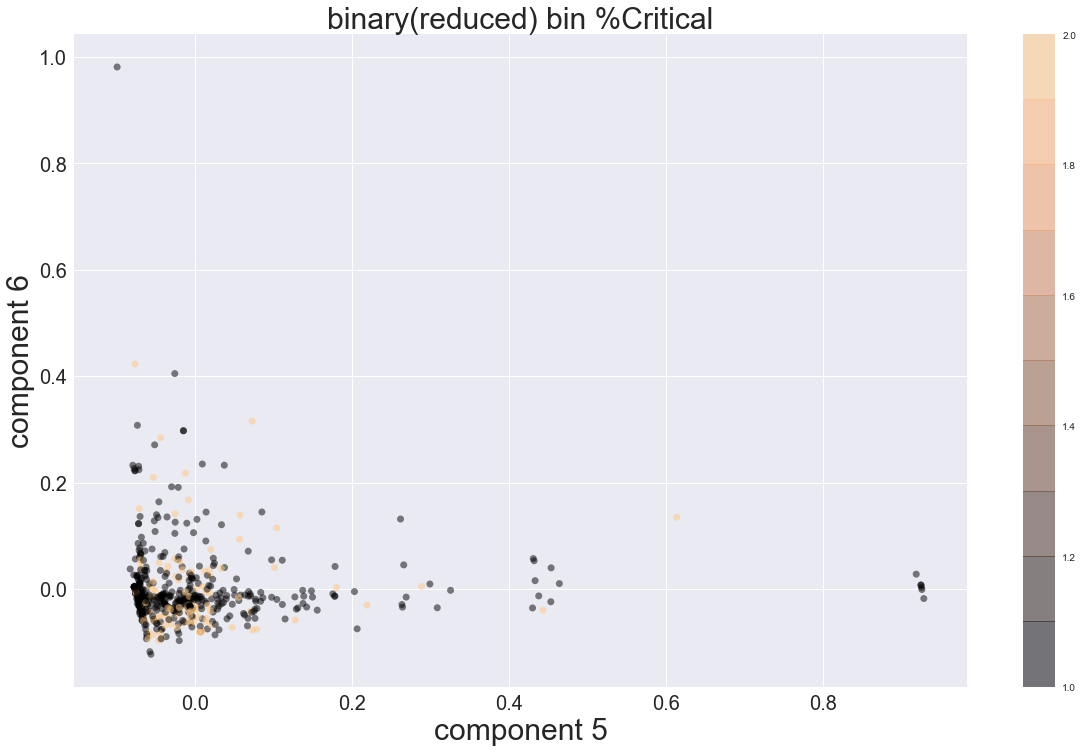

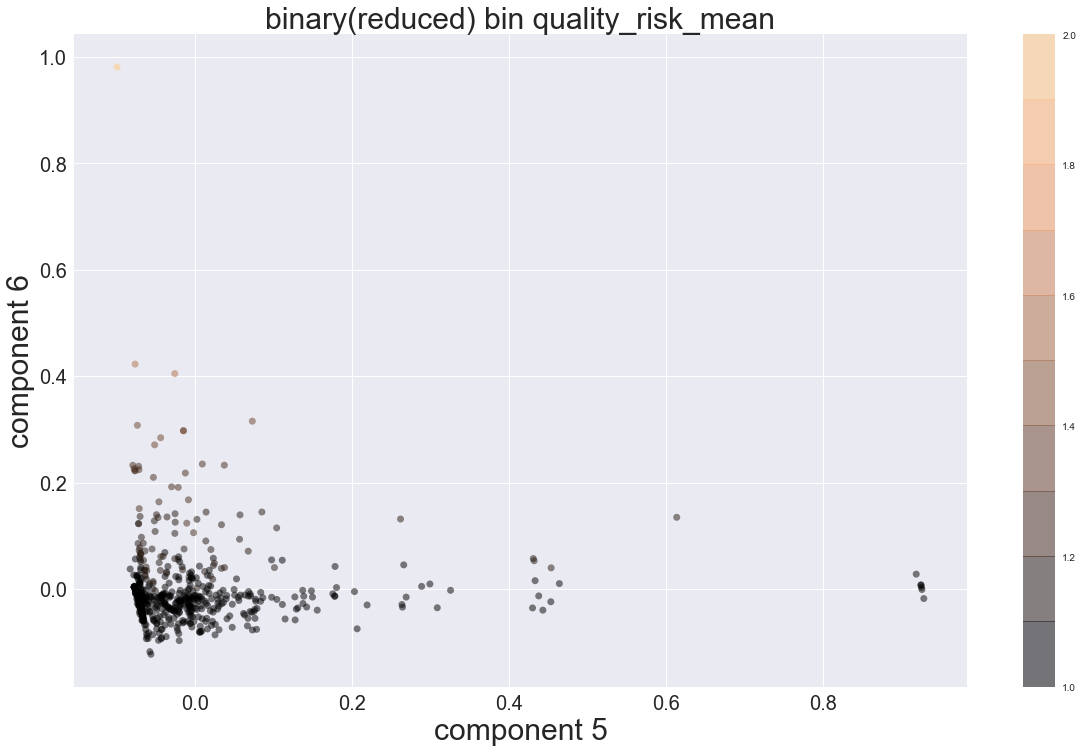

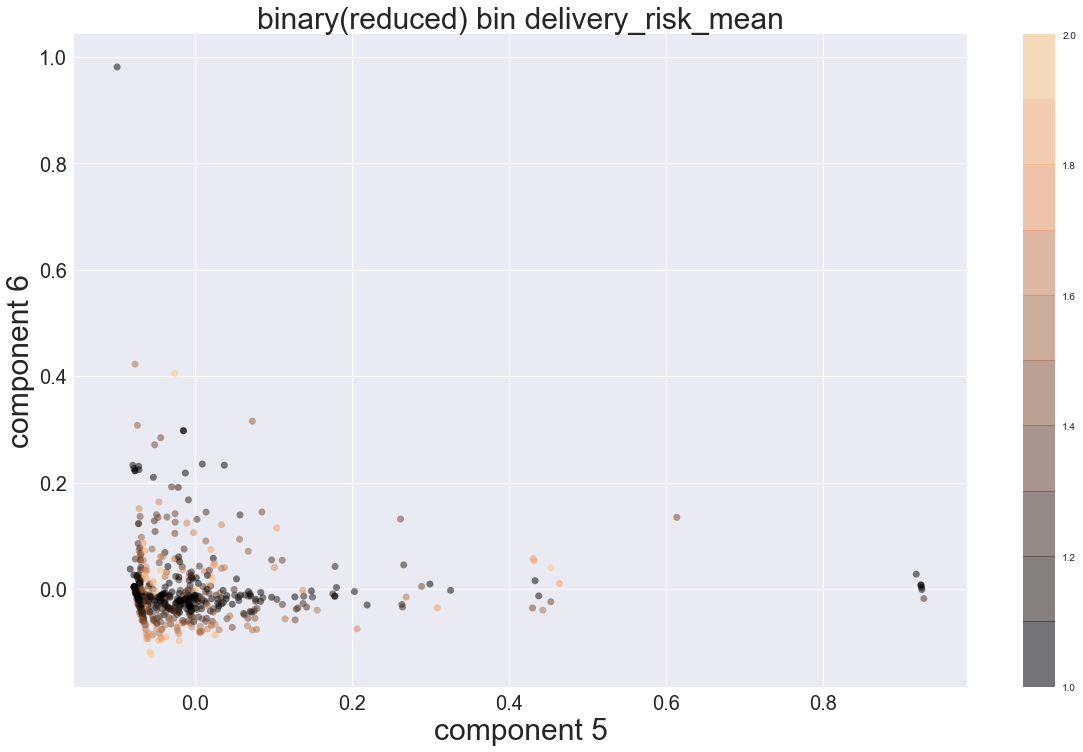

In [9]:
#Optional colormap changing
# cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['black','orange'], N=256)

#Plot the components against each feature
#Each plot shows the 12 dimensional data projected along two dimensions of high variance(the components)
#This is the optimal stretch and rotation in the 12-D data that lets us see the separation of the data in 2 dimension.
for feat in feats:
    plt.figure(figsize=(20,12))
    plt.scatter(projected[:, 4], projected[:, 5],
                c=x[feat], edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('copper', 10))
    plt.xlabel('component 5', fontsize=30)
    plt.ylabel('component 6', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.title(file+" bin "+feat, fontsize=30)
    plt.colorbar();
    fname = method+"_"+file+"_5_6_" + feat
    plt.savefig(fname)
    plt.show()